# **Notebook Research Question Seleksi Data Science**
#### Tim HaveFun

# 1. Urgensi Memprediksi Nilai Kesadahan (Hardness) Air

Memprediksi nilai kesadahan (hardness) air tanah adalah hal yang mendesak dalam konteks bisnis dan ilmiah karena berdampak langsung pada efisiensi operasional industri, kualitas produk, kesehatan manusia, dan perlindungan ekosistem.[1][2] Air keras, yang ditandai dengan tingginya kadar ion kalsium dan magnesium, dapat menyebabkan berbagai masalah di lingkungan industri dan ilmiah. Di industri, air keras dapat menyebabkan penumpukan kerak pada mesin, meningkatkan biaya pemeliharaan, dan mempengaruhi kualitas produk akhir.[3] Di bidang ilmiah, kesadahan air tanah mempengaruhi ekosistem akuatik dan kesehatan manusia, serta memberikan wawasan penting mengenai perubahan lingkungan dan iklim.[3] Selain itu, prediksi kesadahan air membantu memastikan kepatuhan terhadap standar kualitas air yang ditetapkan untuk melindungi kesehatan masyarakat dan mengoptimalkan pengelolaan sumber daya air. Urgensi ini berasal dari kerentanan air tanah terhadap kontaminasi, waktu yang lama, dan biaya tinggi yang diperlukan untuk pemulihan, serta peran penting air tanah dalam berbagai sektor. Hal ini membuat prediksi yang akurat sangat penting untuk pengelolaan sumber daya air yang berkelanjutan dan perlindungan lingkungan.[4][5]

Referensi:

[1] M. S. Hanoon et al., “Application of Soft Computing in Predicting Groundwater Quality Parameters,” Front Environ Sci, vol. 10, Feb. 2022, doi: 10.3389/fenvs.2022.828251.

[2] A. K. A. Ahmed, M. El-Rawy, A. M. Ibraheem, N. Al-Arifi, and M. K. Abd-Ellah, “Forecasting of Groundwater Quality by Using Deep Learning Time Series Techniques in an Arid Region,” Sustainability, vol. 15, no. 8, p. 6529, Apr. 2023, doi: 10.3390/su15086529.

[3] Dr. Anita Dubey, “A Study On Effects Of Hard Water On Human Health,” Research Ambition: An International Multidisciplinary e-Journal, vol. 6, no. IV, pp. 15–16, Feb. 2022, doi: 10.53724/ambition/v6n4.06.

[4] A. Mosavi et al., “Susceptibility Prediction of Groundwater Hardness Using Ensemble Machine Learning Models,” Water (Basel), vol. 12, no. 10, p. 2770, Oct. 2020, doi: 10.3390/w12102770.

[5] X. Zhang, H. Chen, G. Zhu, D. Zhao, and B. Duan, “A new groundwater depth prediction model based on EMD-LSTM,” Water Supply, vol. 22, no. 6, pp. 5974–5988, Jun. 2022, doi: 10.2166/ws.2022.230.

# 2. Underfitting vs Overfitting

Berdasarkan nilai MAE cross-validation sebesar 23.2165 yang rendah, ini menunjukkan bahwa model Random Forest tidak mengalami overfitting yang signifikan terhadap data latih. Overfitting terjadi ketika model terlalu kompleks dan "menghafal" data latih dengan sangat baik, namun gagal dalam menggeneralisasi dengan baik pada data yang belum pernah dilihat sebelumnya (data uji atau validasi). Dalam konteks ini, nilai MAE yang rendah pada data validasi dan cross-validation menunjukkan bahwa model cenderung melakukan prediksi yang baik pada data baru, menunjukkan bahwa tidak ada overfitting yang signifikan. **Hasil MAE cross-validation dapat dilihat di bawah nomor 9**.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler

In [2]:
# load data
train_df     = pd.read_csv('/kaggle/input/seleksi-data-science-academy-compfest-16/train.csv')
test_df      = pd.read_csv('/kaggle/input/seleksi-data-science-academy-compfest-16/test.csv')

# preview the data
train_df.head()

,id,"Alkalinity, total",Calcium,Chloride,Fluoride,Magnesium,Nitrate as N,Sodium,Specific Conductivity,Sulfate,Total Dissolved Solids,Hardness
0,0,120.0,24.0,6.9,0.314,7.1,0.498,48.0,510.0,23.2,240.0,90.4
1,1,140.0,41.0,11.0,0.150,6.5,0.950,19.0,300.0,8.5,190.0,130.0
2,2,160.0,51.0,9.0,0.450,9.1,2.500,12.0,370.0,25.0,230.0,160.0
3,3,46.0,13.0,2.9,0.120,2.7,0.430,6.4,110.0,5.0,97.0,41.0
4,4,240.0,147.0,70.0,0.600,48.0,6.800,93.0,1410.0,418.0,950.0,586.0


In [3]:
# summary
train_df.describe()

,id,"Alkalinity, total",Calcium,Chloride,Fluoride,Magnesium,Nitrate as N,Sodium,Specific Conductivity,Sulfate,Total Dissolved Solids,Hardness
count,6400.000000,6400.000000,6400.000000,6400.000000,6400.000000,6400.000000,6400.000000,6400.000000,6400.000000,6400.000000,6400.000000,6400.000000
mean,3199.500000,167.151047,69.350432,53.213620,0.333625,23.446335,3.382707,62.437731,637.631953,71.645934,409.570669,216.148203
std,1847.665193,83.157803,1052.136452,92.934505,0.452473,325.389503,4.878279,556.891904,597.297274,108.414049,302.958442,161.431526
min,0.000000,12.000000,0.610000,0.580000,0.049000,0.051000,0.002300,1.300000,40.000000,0.140000,19.580000,2.500000
25%,1599.750000,110.000000,25.000000,11.000000,0.140000,7.300000,0.850000,21.000000,340.000000,13.000000,220.000000,101.000000
50%,3199.500000,153.500000,45.000000,28.000000,0.210000,14.000000,2.000000,35.000000,520.000000,33.000000,320.000000,180.000000
75%,4799.250000,209.000000,72.000000,62.000000,0.382250,25.000000,4.300000,60.000000,800.000000,85.000000,500.000000,281.000000
max,6399.000000,1000.000000,83000.000000,2100.000000,9.000000,26000.000000,106.000000,32000.000000,31400.000000,2000.000000,4100.000000,1901.000000


In [4]:
test_df.describe()

,id,"Alkalinity, total",Calcium,Chloride,Fluoride,Magnesium,Nitrate as N,Sodium,Specific Conductivity,Sulfate,Total Dissolved Solids
count,1601.000000,1601.000000,1601.000000,1601.000000,1601.000000,1601.000000,1601.000000,1601.000000,1601.000000,1601.000000,1601.000000
mean,7200.000000,168.832299,55.668958,51.481462,0.349397,62.757297,3.423275,77.886431,659.276702,75.164221,409.850094
std,462.313206,82.953613,41.717342,77.520902,0.551632,1724.080876,4.968633,780.983717,620.275872,121.649147,271.134286
min,6400.000000,9.400000,0.260000,0.460000,0.000000,0.064000,0.004740,2.200000,66.000000,0.390000,29.000000
25%,6800.000000,110.000000,26.000000,12.000000,0.140000,7.800000,0.770000,21.000000,351.000000,13.100000,230.000000
50%,7200.000000,160.000000,46.200000,31.000000,0.210000,15.000000,2.000000,35.000000,530.000000,34.000000,330.000000
75%,7600.000000,210.000000,74.000000,63.000000,0.380000,25.000000,4.300000,61.000000,815.000000,94.600000,510.000000
max,8000.000000,700.000000,460.000000,1300.000000,9.900000,69000.000000,58.200000,27400.000000,17400.000000,2100.000000,2300.000000


# Exploratory Data Analysis

In [5]:
# check null val
train_df.isnull().sum()

id                        0
Alkalinity, total         0
Calcium                   0
Chloride                  0
Fluoride                  0
Magnesium                 0
Nitrate as N              0
Sodium                    0
Specific Conductivity     0
Sulfate                   0
Total Dissolved Solids    0
Hardness                  0
dtype: int64

In [6]:
test_df.isnull().sum()

id                        0
Alkalinity, total         0
Calcium                   0
Chloride                  0
Fluoride                  0
Magnesium                 0
Nitrate as N              0
Sodium                    0
Specific Conductivity     0
Sulfate                   0
Total Dissolved Solids    0
dtype: int64

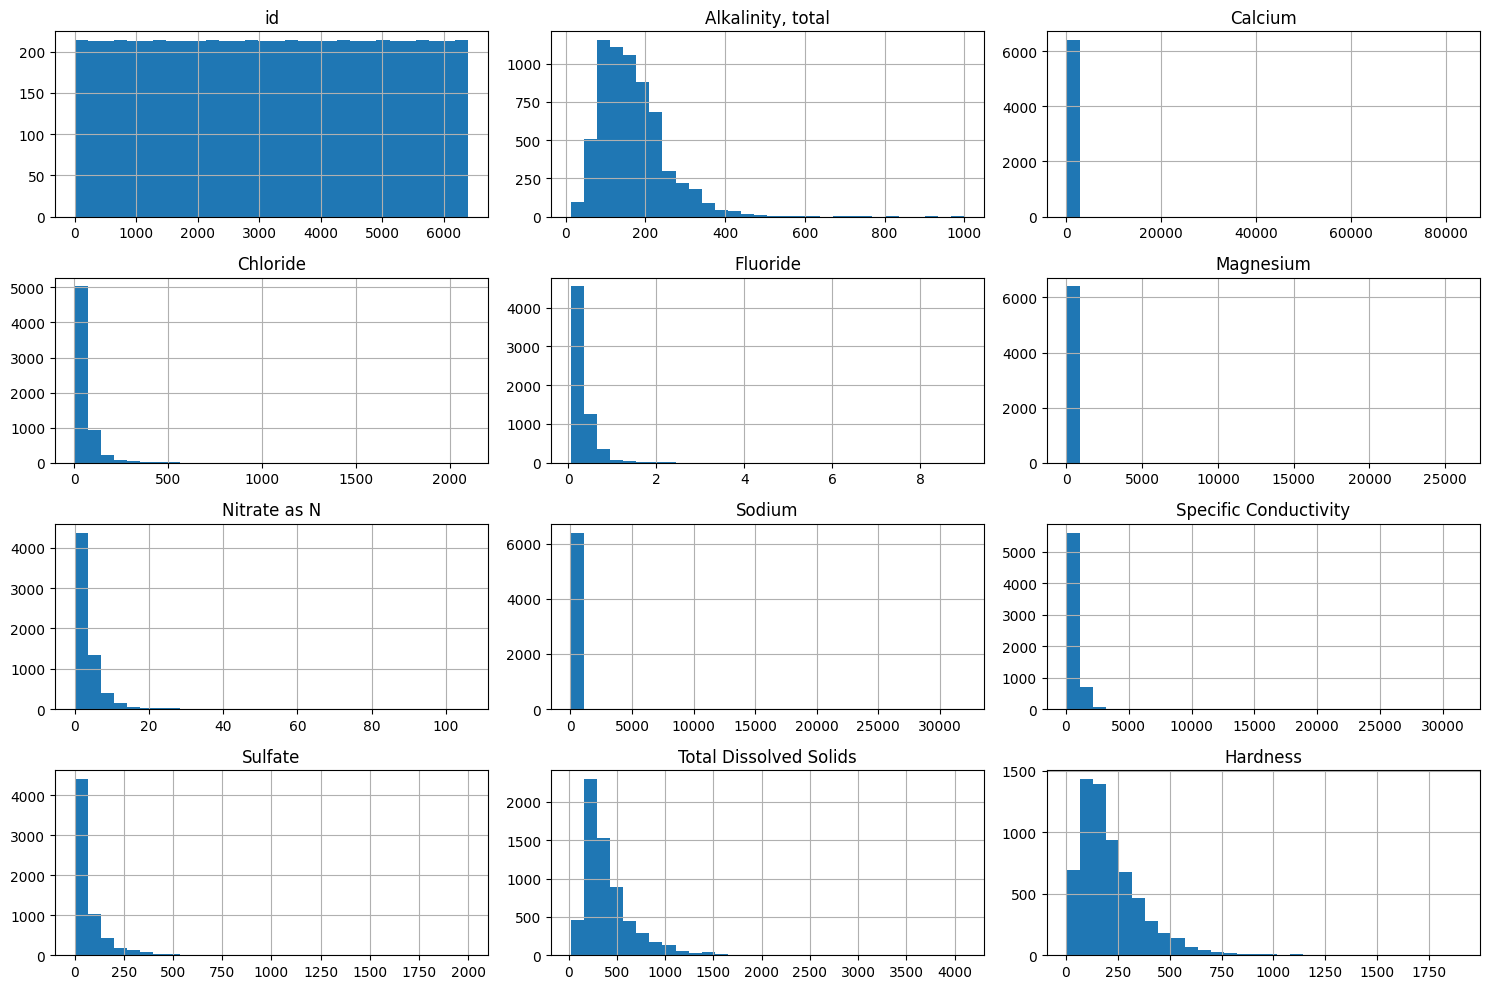

In [7]:
# distribusi data
train_df.hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()

# 3. Statistical Analysis

## a. Hardness rata-rata dari sumber air yang memiliki kadar sodium di atas persentil 75 dan memiliki tingkat kebasaan (Alkalinity) di atas rata-rata

In [8]:
# menghitung kadar sodium diatas persentil 75 dan mencari mean alkalinity
sodium_75 = np.percentile(train_df['Sodium'], 75)
alkalinity_mean = train_df['Alkalinity, total'].mean()

# filter data untuk menghitung rata2 hardness dengan sodium diatas eprsentil 75 dan Alkalinity diatas mean
high_sodium_alkalinity = train_df[(train_df['Sodium'] > sodium_75) & (train_df['Alkalinity, total'] > alkalinity_mean)]
average_hardness = high_sodium_alkalinity['Hardness'].mean()

average_hardness

383.0833134765625

## b. Apakah ada sumber air yang memiliki tingkat kebasaan (Alkalinity) yang dapat dianggap outlier? Jelaskan!

Ya, terdapat 174 sumber air yang memiliki tingkat kebasaan (Alkalinity) yang dapat dianggap sebagai outlier. Ini menunjukkan bahwa ada sejumlah sumber air yang memiliki tingkat alkalinitas yang sangat berbeda dari mayoritas data. Hal ini bisa disebabkan oleh berbagai faktor, seperti kondisi lingkungan yang unik, kontaminasi, atau bahkan kesalahan pengukuran.

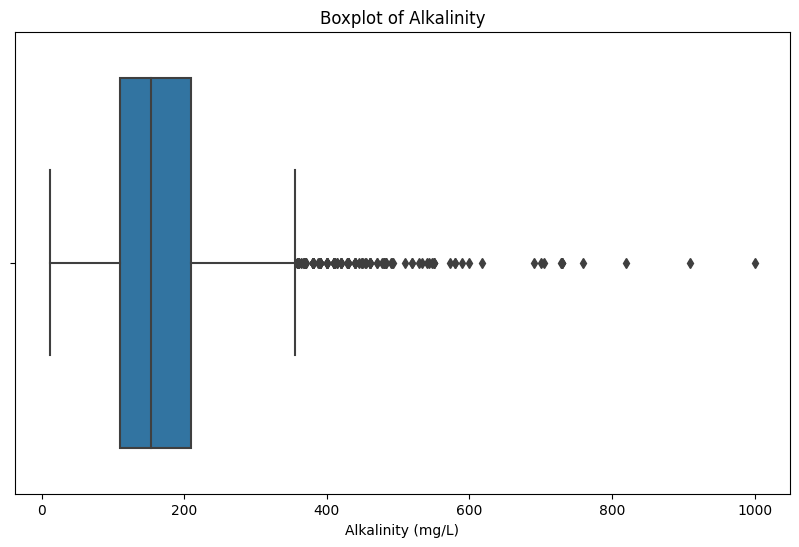

In [9]:
# boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=train_df['Alkalinity, total'])
plt.title('Boxplot of Alkalinity')
plt.xlabel('Alkalinity (mg/L)')
plt.show()

In [10]:
Q1 = train_df['Alkalinity, total'].quantile(0.25)
Q3 = train_df['Alkalinity, total'].quantile(0.75)
IQR = Q3 - Q1

# define outliers
outliers = train_df[(train_df['Alkalinity, total'] < (Q1 - 1.5 * IQR)) | (train_df['Alkalinity, total'] > (Q3 + 1.5 * IQR))]

len(outliers),outliers.head()

(174,
     id  Alkalinity, total  Calcium  Chloride  Fluoride  Magnesium  \
 34  34              400.0    31.00     160.0      0.40      43.00   
 36  36              360.0    16.00     170.0      1.70      14.00   
 39  39              617.0    87.30     179.0      1.20      71.20   
 48  48              360.0   153.00     146.0      0.10      90.00   
 54  54              370.0    69.89      82.8      0.21      32.51   
 
     Nitrate as N  Sodium  Specific Conductivity  Sulfate  \
 34           1.3   290.0                 1290.0     42.0   
 36           1.1   270.0                 1600.0    170.0   
 39           4.4    96.0                 1640.0     47.2   
 48           1.5    56.0                 1600.0    320.0   
 54           0.9    88.0                  928.0     84.6   
 
     Total Dissolved Solids  Hardness  
 34                   700.0     272.0  
 36                   760.0      28.0  
 39                   940.0     511.0  
 48                  1070.0     752.0  
 54 

# 4. Hubungan antara Specific Conductivity dan Hardness

Visualisasi dan hasil korelasi menunjukkan bahwa Specific Conductivity dan Hardness memiliki hubungan positif moderat. Hal ini berarti bahwa meskipun tidak selalu ada hubungan linier yang kuat antara kedua variabel tersebut, secara umum, material dengan Specific Conductivity yang tinggi cenderung memiliki Hardness yang lebih tinggi. Hal ini juga dapat dijelaskan berdasarkan sifat fisika material.

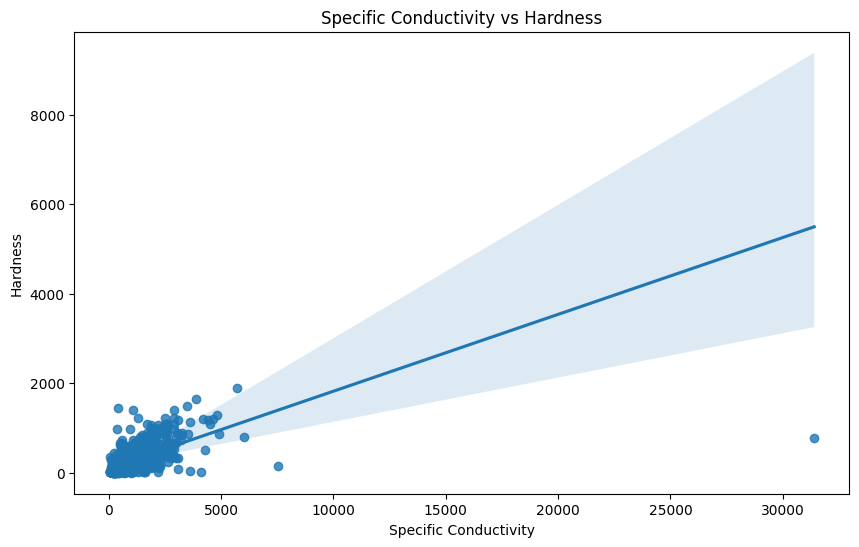

0.6352710459414745

In [11]:
# scatter plot
plt.figure(figsize=(10, 6))
sns.regplot(x='Specific Conductivity', y='Hardness', data=train_df)
plt.title('Specific Conductivity vs Hardness')
plt.xlabel('Specific Conductivity')
plt.ylabel('Hardness')
plt.show()

# korelasi
correlation = train_df['Specific Conductivity'].corr(train_df['Hardness'])
correlation

# 5. Zat-zat apa saja yang paling mempengaruhi dan paling tidak mempengaruhi Hardness?

Berdasarkan heatmap dan nilai korelasi dengan hardness, zak kimia yang paling mempengaruhi hardness adalah Total Dissolved Solids (TDS) dan yang paling tidak mempengaruhi adalah Fluroide.

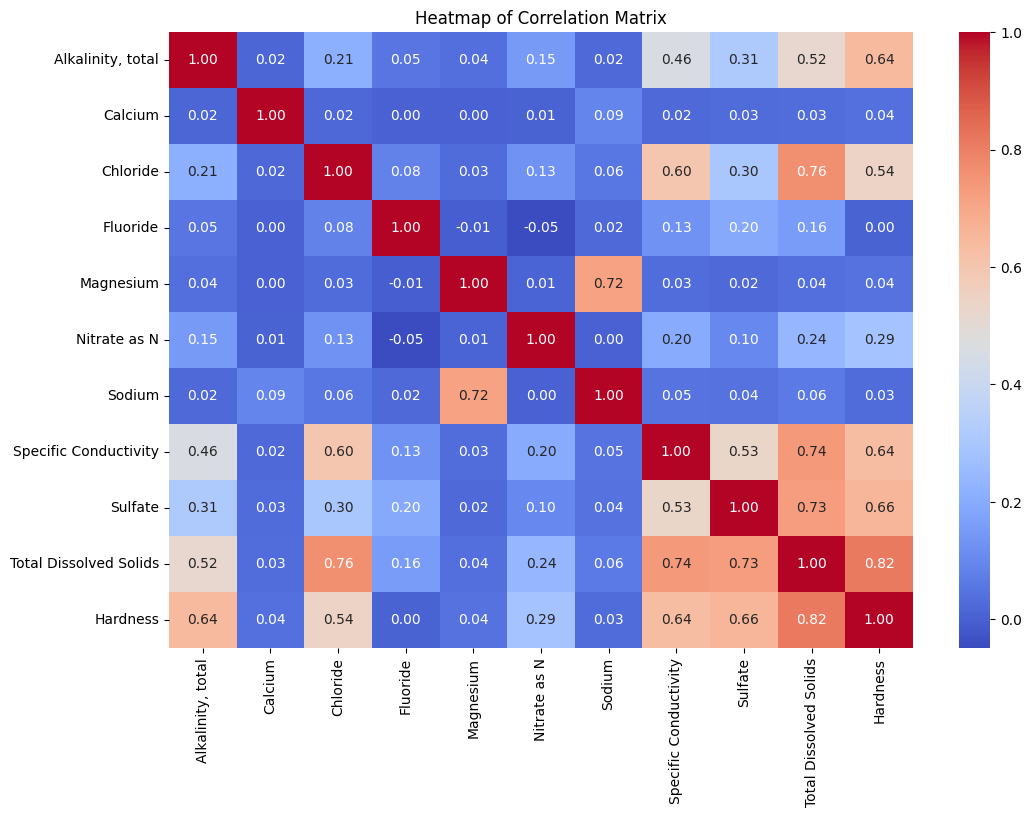

('Total Dissolved Solids',
 0.8152019321407044,
 'Fluoride',
 0.004646560282489323)

In [12]:
# matriks korelasi
correlation_matrix = train_df.drop(columns=['id']).corr()

# heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap of Correlation Matrix')
plt.show()

# korelasi dengan Hardness
correlation_with_hardness = correlation_matrix['Hardness'].sort_values(ascending=False)
most_influential = correlation_with_hardness.index[1]  # Paling berpengaruh (selain Hardness sendiri)
least_influential = correlation_with_hardness.index[-1]  # Paling sedikit berpengaruh

most_influential, correlation_with_hardness[most_influential], least_influential, correlation_with_hardness[least_influential]

# 6. Pasangan zat kimia yang berkorelasi tinggi dan efek dari korelasi tersebut?

Perhitungan korelasi menunjukkan bahwa Chloride memiliki korelasi yang tinggi dengan TDS, yaitu 0.76. Efek yang ditimbulkan dari korelasi yang tinggi ini adalah ketika Chloride meingkat TDS akan cenderung meningkat.

In [13]:
# pasangan dengan korelasi yang tinggi
correlation_matrix = train_df.drop(columns=['id','Hardness']).corr()

high_corr_pairs = correlation_matrix.unstack().sort_values(ascending=False).drop_duplicates()
high_corr_pairs = high_corr_pairs[high_corr_pairs < 1]  # Exclude self-correlation

# threshold untuk korelasi yang tinggi e.g. 0.7
high_corr_threshold = 0.7
high_corr_pairs = high_corr_pairs[high_corr_pairs > high_corr_threshold]

high_corr_pairs

Total Dissolved Solids  Chloride                  0.763876
Specific Conductivity   Total Dissolved Solids    0.736235
Total Dissolved Solids  Sulfate                   0.727603
Sodium                  Magnesium                 0.717236
dtype: float64

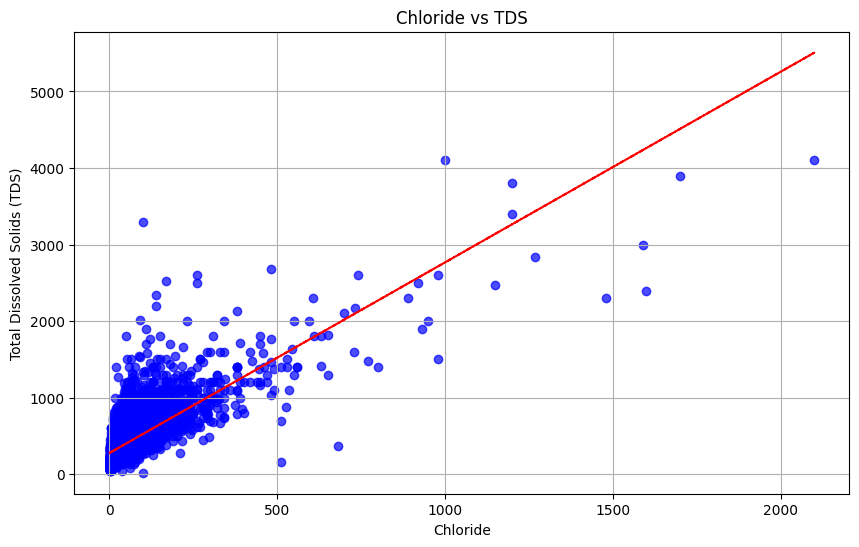

In [14]:
# scatter plot
data_x = train_df['Chloride']
data_y = train_df['Total Dissolved Solids']

plt.figure(figsize=(10, 6))
plt.scatter(data_x, data_y, alpha=0.7, color='blue')

# menambahkan Garis Korelasi
m, b = np.polyfit(data_x, data_y, 1)  # Menghitung koefisien regresi linier
plt.plot(data_x, m*data_x + b, color='red', linestyle='--')

plt.xlabel('Chloride')
plt.ylabel('Total Dissolved Solids (TDS)')
plt.title('Chloride vs TDS')

plt.grid(True)
plt.show()

# 7. Feature Engineering

In [15]:
train_df['Cation_Balance'] = train_df['Calcium'] + train_df['Magnesium'] + train_df['Sodium']
train_df['Anion_Balance'] = train_df['Chloride'] + train_df['Fluoride'] + train_df['Nitrate as N'] + train_df['Sulfate']
train_df['Ca_Mg_Ratio'] = train_df['Calcium'] / (train_df['Magnesium'] + 1e-5)  # Adding a small constant to avoid division by zero
train_df['Conductivity_TDS_Ratio'] = train_df['Specific Conductivity'] / (train_df['Total Dissolved Solids'] + 1e-5)
train_df['Total_Ion_Concentration'] = train_df[['Calcium', 'Magnesium', 'Sodium', 'Chloride', 'Fluoride', 'Nitrate as N', 'Sulfate']].sum(axis=1)

# Display the first few rows to check the new features
print(train_df.head())

   id  Alkalinity, total  Calcium  Chloride  Fluoride  Magnesium  \
0   0              120.0     24.0       6.9     0.314        7.1   
1   1              140.0     41.0      11.0     0.150        6.5   
2   2              160.0     51.0       9.0     0.450        9.1   
3   3               46.0     13.0       2.9     0.120        2.7   
4   4              240.0    147.0      70.0     0.600       48.0   

   Nitrate as N  Sodium  Specific Conductivity  Sulfate  \
0         0.498    48.0                  510.0     23.2   
1         0.950    19.0                  300.0      8.5   
2         2.500    12.0                  370.0     25.0   
3         0.430     6.4                  110.0      5.0   
4         6.800    93.0                 1410.0    418.0   

   Total Dissolved Solids  Hardness  Cation_Balance  Anion_Balance  \
0                   240.0      90.4            79.1         30.912   
1                   190.0     130.0            66.5         20.600   
2                   230.0 

In [16]:
# add feature engineering to the test data
test_df['Cation_Balance'] = train_df['Calcium'] + train_df['Magnesium'] + train_df['Sodium']
test_df['Anion_Balance'] = train_df['Chloride'] + train_df['Fluoride'] + train_df['Nitrate as N'] + train_df['Sulfate']
test_df['Ca_Mg_Ratio'] = train_df['Calcium'] / (train_df['Magnesium'] + 1e-5)  # Adding a small constant to avoid division by zero
test_df['Conductivity_TDS_Ratio'] = train_df['Specific Conductivity'] / (train_df['Total Dissolved Solids'] + 1e-5)
test_df['Total_Ion_Concentration'] = train_df[['Calcium', 'Magnesium', 'Sodium', 'Chloride', 'Fluoride', 'Nitrate as N', 'Sulfate']].sum(axis=1)

# Display the first few rows to check the new features
print(test_df.head())

     id  Alkalinity, total  Calcium  Chloride  Fluoride  Magnesium  \
0  6400               93.0     15.9       3.6     0.100       11.9   
1  6401              180.0     34.0     200.0     1.900        8.2   
2  6402               95.0     44.0      35.0     0.081        3.3   
3  6403              110.0     29.0      12.0     0.250        6.0   
4  6404              179.0     59.0      51.7     0.160       45.0   

   Nitrate as N  Sodium  Specific Conductivity  Sulfate  \
0          1.40    12.7                  208.0      6.5   
1          1.30   300.0                 1700.0    210.0   
2          1.10    28.0                  390.0     22.0   
3          0.15    23.0                  283.0     15.0   
4          4.10    64.0                  976.0    170.0   

   Total Dissolved Solids  Cation_Balance  Anion_Balance  Ca_Mg_Ratio  \
0                   156.0            79.1         30.912     3.380277   
1                   860.0            66.5         20.600     6.307683   
2    

# 8. Model Prediksi Hardness

Berdasarkan perbandingan model yang dilakukan, Random Forest dan Gradient Boosting menunjukkan performa yang baik dalam mengurangi overfitting. Meskipun Gradient Boosting menawarkan generalisasi yang sedikit lebih baik, nilai MAE dari Random Forest lebih rendah. Oleh karena itu, model final yang dipilih adalah Random Forest dengan hasil evaluasi sebagai berikut:

* R² pada data latih (r2_train): 0.9874
* R² pada data validasi (r2_val): 0.9082
* Rata-rata cross-validation (cross_val_mean): 0.9030
* Mean Absolute Error (MAE): 23.6875
* Mean Squared Error (MSE): 2522.3795
* Root Mean Squared Error (RMSE): 50.2233

Random Forest menunjukkan kinerja yang sangat baik dengan MAE sebesar 23.6875, yang merupakan nilai paling rendah dibandingkan dengan model-model lainnya. Hal ini menandakan bahwa Random Forest mampu memberikan prediksi yang lebih dekat dengan nilai sebenarnya dari target variabel (Hardness) dalam dataset ini. Oleh karena itu, Random Forest dipilih sebagai model final untuk prediksi Hardness.

In [17]:
# split the data
X = train_df.drop(columns=['id', 'Hardness'])
y = train_df['Hardness']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# define models with initial parameters
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(max_iter=50000),
    'ElasticNet Regression': ElasticNet(max_iter=50000),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42)
}

# grid search parameters
param_grid = {
    'Ridge Regression': {'alpha': [0.1, 1.0, 10.0, 100.0]},
    'Lasso Regression': {'alpha': [0.01, 0.1, 1.0, 10.0]},
    'ElasticNet Regression': {'alpha': [0.01, 0.1, 1.0, 10.0], 'l1_ratio': [0.1, 0.5, 0.9]},
    'Random Forest': {'n_estimators': [50, 100, 200]},
    'Gradient Boosting': {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2]}
}

# evaluate models
results = {}
for name, model in models.items():
    if name in param_grid:
        grid_search = GridSearchCV(model, param_grid[name], cv=5, n_jobs=-1)
        grid_search.fit(X_train_scaled, y_train)
        best_model = grid_search.best_estimator_
    else:
        best_model = model
        best_model.fit(X_train_scaled, y_train)
    
    # cross-validation
    cross_val_scores = cross_val_score(best_model, X_train_scaled, y_train, cv=5)
    cross_val_mean = cross_val_scores.mean()
    
    # predictions
    y_train_pred = best_model.predict(X_train_scaled)
    y_val_pred = best_model.predict(X_val_scaled)
    
    # calculate evaluation metrics
    r2_train = r2_score(y_train, y_train_pred)
    r2_val = r2_score(y_val, y_val_pred)
    mae = mean_absolute_error(y_val, y_val_pred)
    mse = mean_squared_error(y_val, y_val_pred)
    rmse = mean_squared_error(y_val, y_val_pred, squared=False)
    
    # store the results
    results[name] = {
        'r2_train': r2_train,
        'r2_val': r2_val,
        'cross_val_mean': cross_val_mean,
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse
    }

results

{'Linear Regression': {'r2_train': 0.9126270970515954,
  'r2_val': -408.54647968688687,
  'cross_val_mean': -0.13107736722112678,
  'MAE': 143.05305491838502,
  'MSE': 11256000.624266837,
  'RMSE': 3354.9963672509152},
 'Ridge Regression': {'r2_train': 0.8848485246924037,
  'r2_val': -133.58647566106433,
  'cross_val_mean': 0.7889489993547227,
  'MAE': 110.69485357162412,
  'MSE': 3698982.970667978,
  'RMSE': 1923.2740238114739},
 'Lasso Regression': {'r2_train': 0.7981552666422398,
  'r2_val': -112.8313927295694,
  'cross_val_mean': 0.7839005782560788,
  'MAE': 95.69561108739894,
  'MSE': 3128548.9954761337,
  'RMSE': 1768.7704756344542},
 'ElasticNet Regression': {'r2_train': 0.8419766991964726,
  'r2_val': -79.91245683327168,
  'cross_val_mean': 0.8151110056201606,
  'MAE': 93.98329774614194,
  'MSE': 2223802.937636215,
  'RMSE': 1491.2420788175925},
 'Random Forest': {'r2_train': 0.9873714444633641,
  'r2_val': 0.908223918422932,
  'cross_val_mean': 0.9030149844504163,
  'MAE': 23.

# 9. Metrik Penilaian

R2 (Coefficient of Determination) adalah metrik yang berguna untuk mengevaluasi seberapa baik model regresi dapat menjelaskan variasi dalam data. Namun, kegunaan R2 dapat dibatasi dalam konteks dataset yang mengandung banyak outlier. Alasan utamanya adalah:

* Pengaruh Outlier: R2 dapat sangat dipengaruhi oleh outlier dalam dataset. Outlier dapat memiliki pengaruh yang signifikan terhadap nilai R2, terutama jika mereka memiliki residu yang besar. Hal ini dapat mengarah pada penilaian yang tidak akurat terhadap kualitas keseluruhan model.
* Interpretasi Relatif: R2 memberikan informasi tentang seberapa besar variasi dari variabel target yang dapat dijelaskan oleh model. Namun, untuk interpretasi yang lebih langsung tentang seberapa baik model memprediksi nilai yang sebenarnya, Metode Mean Absolute Error (MAE) lebih disarankan. MAE memberikan gambaran langsung tentang rata-rata kesalahan absolut dari prediksi model, tanpa dipengaruhi oleh nilai kuadrat dari kesalahan (seperti pada MSE) atau hubungan kuadrat dari kedua data asli dan hasil prediksi.

Dengan demikian, dalam konteks dataset yang mengandung banyak outlier seperti data ini, implementasi MAE sebagai metrik evaluasi yang lebih detail dan sensitif dapat memberikan informasi yang lebih relevan tentang kualitas prediksi model. MAE menawarkan keuntungan interpretatif yang lebih langsung dan lebih stabil terhadap variasi data, terutama ketika menangani kasus-kasus ekstrem dalam data.

In [18]:
model = RandomForestRegressor(random_state=42)
model.fit(X_train_scaled, y_train)

# prediksi training dan validation sets
y_train_pred = model.predict(X_train_scaled)
y_val_pred = model.predict(X_val_scaled)

# kalkulasi MAE pada training dan validation set
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_val = mean_absolute_error(y_val, y_val_pred)

print(f"MAE pada data latih: {mae_train:.4f}")
print(f"MAE pada data validasi: {mae_val:.4f}")

MAE pada data latih: 8.5669
MAE pada data validasi: 23.7884


In [19]:
best_rf_model = RandomForestRegressor(n_estimators=100, max_depth=20, min_samples_split=5, min_samples_leaf=2, random_state=42)

# validasi silang untuk evaluasi MAE
cross_val_scores = cross_val_score(best_rf_model, X_train_scaled, y_train, cv=5, scoring='neg_mean_absolute_error')
mae_cv_mean = -cross_val_scores.mean()

print(f"Mean Absolute Error dari cross-validation: {mae_cv_mean:.4f}")

Mean Absolute Error dari cross-validation: 23.2165


# Prediksi Hardness pada Data Testing dengan Random Forest

In [20]:
# Prepare the test data
X_test = test_df.drop(columns=['id'])  # Assuming 'id' column is present and 'Hardness' column is not needed for prediction

# Standardize the test features
X_test_scaled = scaler.transform(X_test)

# Predictions on the test set using the best model (Random Forest)
y_test_pred = best_model.predict(X_test_scaled)

# Create a DataFrame for results with 'id' and predicted 'Hardness'
result_df = pd.DataFrame({
    'id': test_df['id'],  # Assuming 'id' is the index or a column in df_test
    'Hardness': y_test_pred
})

# Show the result DataFrame
print(result_df)

        id    Hardness
0     6400  100.015184
1     6401  253.771323
2     6402  125.437454
3     6403   98.471448
4     6404  312.010020
...    ...         ...
1596  7996   35.338080
1597  7997   53.846502
1598  7998  204.241319
1599  7999  217.413007
1600  8000  191.037737

[1601 rows x 2 columns]


In [21]:
# export to csv
result_df.to_csv('hardness_predictions.csv', index=False)
print("Predictions saved to hardness_predictions.csv")

Predictions saved to hardness_predictions.csv


# 10. Data External

Prediksi kekerasan air tanah dipengaruhi oleh berbagai faktor kunci yang diidentifikasi dalam makalah penelitian. Faktor-faktor seperti jarak dari laut, penggunaan lahan, ketinggian, jarak dari sungai, kedalaman air tanah, pH, curah hujan, penguapan, tingkat air tanah, kelengkungan, dan litologi memainkan peran penting dalam memprediksi kerentanan kekerasan air tanah (Mosavi et al., 2020).

Dataset “Groundwater-Quality and Select Quality-Control Data from the National Water Quality Assessment Project, January 2017 through December 2019” dari United States Geological Survey relevan dan dapat membantu menghasilkan pemodelan dan prediksi yang lebih baik karena alasan berikut: [(link dataset)](https://www.usgs.gov/data/datasets-groundwater-quality-and-select-quality-control-data-national-water-quality-assessment)

1. Keragaman Variabel Kualitas Air Tanah:
    * Dataset ini mencakup data dari 983 sumur air tanah yang berasal dari berbagai jenis jaringan sumur, termasuk jaringan studi akuifer utama, jaringan 
    studi penggunaan lahan, jaringan studi tren yang ditingkatkan, dan lainnya.
    * Variabel kualitas air tanah yang diukur meliputi ion utama, nutrisi, unsur jejak, senyawa organik volatil, pestisida, radionuklida, indikator 
    mikrobiologis, dan beberapa konstituen khusus. Informasi ini penting untuk memahami karakteristik air tanah yang memengaruhi kesadahan.

2. Variabel Prediktor yang Signifikan:
    Beberapa variabel yang relevan dengan kesadahan air tanah dan dapat membantu dalam pemodelan meliputi:
    * Jarak dari laut (DFS): Jarak dari garis pantai dapat memengaruhi komposisi mineral dalam air tanah.
    * Penggunaan lahan: Jenis penggunaan lahan (misalnya pertanian, perkotaan) dapat memengaruhi kualitas air tanah.
    * Ketinggian: Perubahan ketinggian mempengaruhi tekanan hidrostatik dan sifat air tanah.
    * Jarak dari sungai (DFR): Proksimitas terhadap sungai dapat memengaruhi aliran air tanah dan komposisi mineral.
    * Kedalaman air tanah (DTGW): Kedalaman muka air tanah memengaruhi interaksi dengan lapisan batuan.
    * pH: Tingkat keasaman atau kebasaan air tanah memengaruhi kelarutan mineral.

3. Data Kontrol Kualitas:
    * Dataset ini juga mencakup data kontrol kualitas yang relevan. Data ini membantu memastikan keandalan hasil pengukuran dan meminimalkan kesalahan 
    dalam pemodelan.
    * Anda dapat memeriksa data kontrol kualitas untuk memastikan integritas dataset.

Referensi:
Mosavi, A., Hosseini, F. S., Choubin, B., Abdolshahnejad, M., Gharechaee, H., Lahijanzadeh, A., & Dineva, A. A. (2020). Susceptibility Prediction of Groundwater Hardness Using Ensemble Machine Learning Models. Water, 12(10), 2770. https://doi.org/10.3390/w12102770